**PWP ETE**

Submitted by,

ANGELA SUNNY

2427007

MBA BA KE                                                                                                                        

**DOMAIN:AGRICULTURE**

DATASET: India’s Imports and Exports of Principal Agricultural Commodities

SOURCE: https://ndap.niti.gov.in/dataset/6165 (National Data and Analytics Platform - Ministry of Agriculture and Farmers Welfare)

This dataset having information about India’s Imports or Exports of Principal Agricultural Commodities includes tea, coffee, rice, groundnut etc. India is among the world’s leading producers of many commodities such as dairy, cereals, spices, fruits & vegetables, rice, wheat, cotton, and others.

**BUSINESS PROBLEM:** How can India optimize its agricultural trade by analyzing import-export trends, commodity performance, and trade efficiency to enhance profitability and ensure food security?

**OBJECTIVES** : 
To analyze India’s agricultural trade optimization, we can use visualizations to understand trade trends, high-value commodities, trade performance, and efficiency.
1) Identify the Trade Volume Over Time
2) Identify High-Value Commodities for Trade Optimization
3) Analyze Commodity-Wise Trade Performance in terms of quantity
4) Assess Trade Efficiency using trade value and trade quantity

In [5]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**SELECT A DATASET**

In [3]:
data = pd.read_csv("C:/Users/ADMIN/Desktop/BA/DATASET/6165_source_data.csv")
data.head()


,Country,Commodity type,srcYear,Imports or exports,Quantity of imports or exports of principal agricultural commodities,Value of imports or exports of principal agricultural commodities,YearCode,Year
0,India,Cashew,2012-13,Exports,104.09,4067.21,2012,"Financial Year (Apr - Mar), 2012"
1,India,Cotton raw including Waste,2009-10,Exports,NaN,9537.08,2009,"Financial Year (Apr - Mar), 2009"
2,India,Sesame seeds,2009-10,Imports,9.23,53.26,2009,"Financial Year (Apr - Mar), 2009"
3,India,Floriculture products,2009-10,Imports,NaN,45.88,2009,"Financial Year (Apr - Mar), 2009"
4,India,Shellac,2009-10,Imports,3.55,34.10,2009,"Financial Year (Apr - Mar), 2009"


In [4]:
data.shape

(1176, 8)

In [5]:
data.info

<bound method DataFrame.info of      Country              Commodity type  srcYear Imports or exports  \
0      India                      Cashew  2012-13            Exports   
1      India  Cotton raw including Waste  2009-10            Exports   
2      India                Sesame seeds  2009-10            Imports   
3      India       Floriculture products  2009-10            Imports   
4      India                     Shellac  2009-10            Imports   
...      ...                         ...      ...                ...   
1171   India      Fruits/vegetable seeds  2020-21            Exports   
1172   India                    Mollases  2020-21            Exports   
1173   India                       Sugar  2020-21            Exports   
1174   India                     Shellac  2020-21            Exports   
1175   India  Total Agricultural Exports  2020-21            Exports   

      Quantity of imports or exports of principal agricultural commodities   \
0                       

**DATA PRE-PROCESSING**

Data preprocessing is essential because raw data often contains inconsistencies, missing values, outliers, and irrelevant information that can negatively impact analysis. In this dataset, first we check missing values,duplicate rows and outliers. Missing values can distort trends, making the analysis unreliable. So we need to impute missing values using mean/median/mode based on the variable. Based on the summary statistics above, Since the mean is much larger than the median,the quantity of import/export is having  a right-skewed distribution So median imputation is a better choice to fill the missing values.

In [6]:
data = data.drop(columns=['Year'])
data.columns

Index(['Country', 'Commodity type', 'srcYear', 'Imports or exports',
       'Quantity of imports or exports of principal agricultural commodities ',
       'Value of imports or exports of principal agricultural commodities ',
       'YearCode'],
      dtype='object')

In [7]:
duplicate_rows = data.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


In [8]:
data.isnull().sum()   #Check null values in columns

Country                                                                    0
Commodity type                                                             0
srcYear                                                                    0
Imports or exports                                                         0
Quantity of imports or exports of principal agricultural commodities     241
Value of imports or exports of principal agricultural commodities          0
YearCode                                                                   0
dtype: int64

In [9]:
data.columns

Index(['Country', 'Commodity type', 'srcYear', 'Imports or exports',
       'Quantity of imports or exports of principal agricultural commodities ',
       'Value of imports or exports of principal agricultural commodities ',
       'YearCode'],
      dtype='object')

In [10]:
#Change column names
data = data.rename(columns={"Quantity of imports or exports of principal agricultural commodities ": "Quantity of imports or exports"})
data = data.rename(columns={"Value of imports or exports of principal agricultural commodities ": "Value of imports or exports"})
data.columns

Index(['Country', 'Commodity type', 'srcYear', 'Imports or exports',
       'Quantity of imports or exports', 'Value of imports or exports',
       'YearCode'],
      dtype='object')

In [11]:
print(data['Quantity of imports or exports'].median())

62.66


In [12]:
#IMPUTATION
# Based on the summary statistics above, Since the mean is much larger than the median,
# the quantity of import/export is having  a right-skewed distribution
# So median imputation is a better choice to fill the missing values

data['Quantity of imports or exports']=data['Quantity of imports or exports'].fillna(np.nanmedian(data['Quantity of imports or exports']))

In [13]:
data.isnull().sum()   #Check null values in columns

Country                           0
Commodity type                    0
srcYear                           0
Imports or exports                0
Quantity of imports or exports    0
Value of imports or exports       0
YearCode                          0
dtype: int64

In [14]:
# Detect outliers using IQR

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in 'Trade Value' and 'Trade Quantity'
outliers_value = detect_outliers_iqr(data, "Value of imports or exports")
outliers_quantity = detect_outliers_iqr(data, "Quantity of imports or exports")

# Display outliers
print("Outliers in Trade Value:\n", outliers_value)
print("Outliers in Trade Quantity:\n", outliers_quantity)

Outliers in Trade Value:
      Country              Commodity type  srcYear Imports or exports  \
16     India  Total Agricultural Exports  2009-10            Exports   
20     India             Marine products  2009-10            Exports   
33     India      Total National Exports  2009-10            Exports   
59     India      Total National Imports  2009-10            Imports   
63     India  Total Agricultural Imports  2009-10            Imports   
...      ...                         ...      ...                ...   
1151   India              Vegetable oils  2020-21            Imports   
1154   India  Cotton raw including Waste  2020-21            Exports   
1169   India                Buffalo meat  2020-21            Exports   
1173   India                       Sugar  2020-21            Exports   
1175   India  Total Agricultural Exports  2020-21            Exports   

      Quantity of imports or exports  Value of imports or exports  YearCode  
16                             

**EXPLORATORY DATA ANALYSIS & VISUALISATIONS**

In [15]:
#DESCRIPTIVE STATISTICS
data.describe()

,Quantity of imports or exports,Value of imports or exports,YearCode
count,1176.000000,1.176000e+03,1176.000000
mean,570.541097,5.151311e+04,2014.500000
std,1663.052365,3.244563e+05,3.453521
min,0.000000,0.000000e+00,2009.000000
25%,12.850000,7.094000e+01,2011.750000
50%,62.660000,7.035800e+02,2014.500000
75%,274.292500,4.002375e+03,2017.250000
max,15643.740000,3.594674e+06,2020.000000


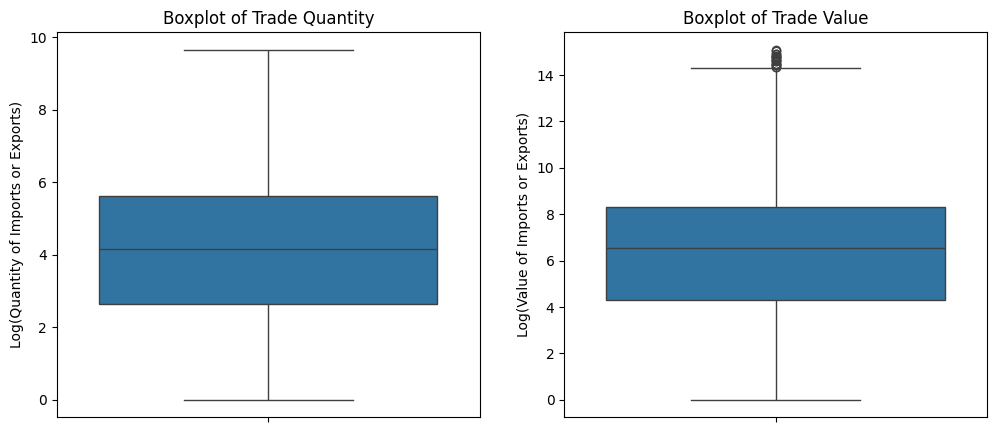

In [53]:
#DETECT OUTLIERS USING BOX PLOT
# Create boxplots for 'Quantity' and 'Value'
plt.figure(figsize=(12, 5))

# Boxplot for Trade Quantity with Log Scale
plt.subplot(1, 2, 1)
sns.boxplot(y=np.log1p(data["Quantity of imports or exports"]))  # log1p handles zero values
plt.title("Boxplot of Trade Quantity")
plt.ylabel("Log(Quantity of Imports or Exports)")

# Boxplot for Trade Value with Log Scale
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log1p(data["Value of imports or exports"]))
plt.title("Boxplot of Trade Value")
plt.ylabel("Log(Value of Imports or Exports)")

plt.show()

As this outliers are valid extreme values, we can retain it for further analysis

**VISUALISATIONS**

In [17]:
# Aggregate total trade value per year
trade_data = data.groupby(['YearCode', 'Imports or exports'])['Value of imports or exports'].sum().reset_index()

# Display sample aggregated data
print(trade_data.head())


   YearCode Imports or exports  Value of imports or exports
0      2009            Exports                   1017886.02
1      2009            Imports                   1469852.20
2      2010            Exports                   1363067.30
3      2010            Imports                   1785617.95
4      2011            Exports                   1831573.79


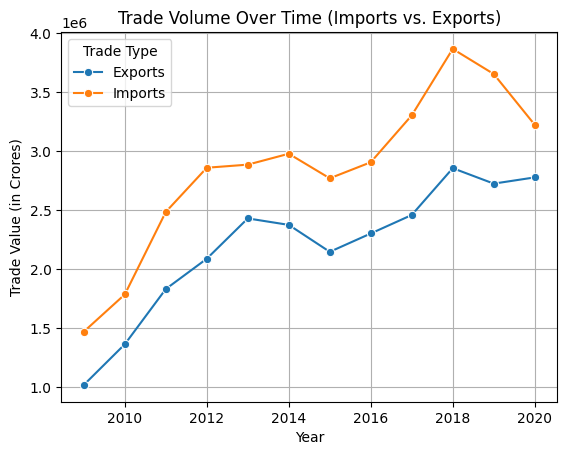

In [18]:
#To analyse Trade Volume Over Time
#Total exports and imports over the years

# Line plot for trade volume over the years
sns.lineplot(
    x='YearCode', 
    y='Value of imports or exports', 
    hue='Imports or exports', 
    data=trade_data, 
    marker="o"
)
plt.title("Trade Volume Over Time (Imports vs. Exports)")
plt.xlabel("Year")
plt.ylabel("Trade Value (in Crores)")
plt.legend(title="Trade Type")
plt.grid(True)
plt.show()



INTERPRETATION:

Both imports and exports show an upward trend from 2009 to 2018, indicating an increase in trade activity. After 2018, there is a slight decline in both imports and exports.Imports consistently exceeds exports throughout the period, showing that the country is importing more than it exports. The sharp increase in imports in 2012-13, potentially due to policy changes, global demand shifts, or economic growth. 2018 is the year which having peak trade activity where imports and exports are higher compared to previous years. The decline in 2019-20 is possibly due to global factors like economic slowdowns or trade policy changes.
Inorder to balance the trade, it might need to boost exports by enhancing domestic production and finding new markets.

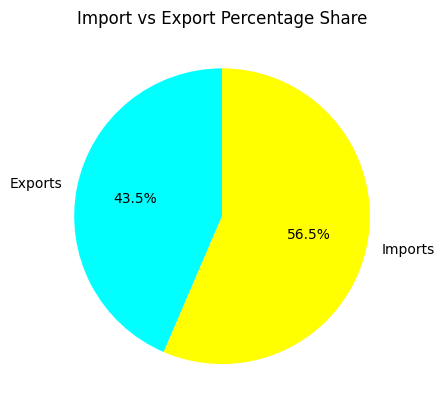

In [21]:
#Import vs. Export percentage ofIndias Agriculture Commodities

trade_summary = data.groupby("Imports or exports")["Value of imports or exports"].sum()

# Plot pie chart
plt.pie(trade_summary, labels=trade_summary.index, autopct='%1.1f%%', colors=['cyan', 'yellow'], startangle=90)
plt.title("Import vs Export Percentage Share")
plt.show()

INTERPRETATION:

The pie chart illustrates the percentage share of imports and exports in the dataset. It reveals that imports constitute 56.5%, while exports account for 43.5% of the total trade volume. India is importing more agricultural commodities than it is exporting, which could indicate a reliance on foreign markets to meet domestic demand.

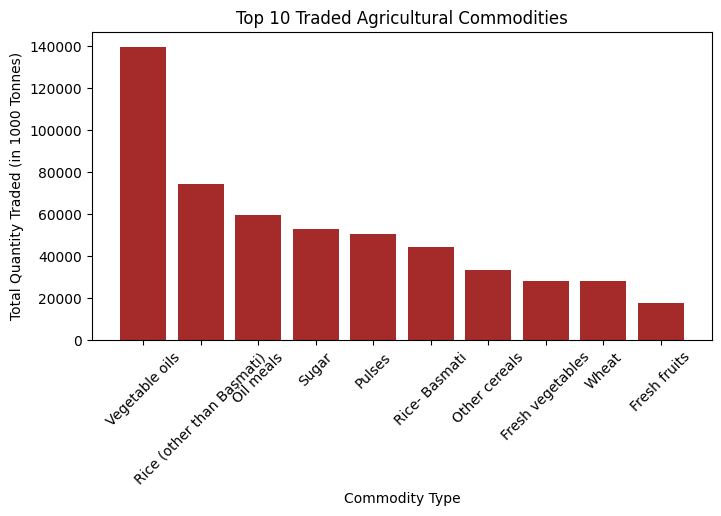

In [23]:
#Identify the most traded agricultural commodities

# Total quantity traded per commodity
commodity_trade = data.groupby('Commodity type')['Quantity of imports or exports'].sum().reset_index()

# Sort commodities by total quantity and select top 10
top_commodities = commodity_trade.sort_values(by='Quantity of imports or exports', ascending=False).head(10)

#Using a bar chart to identify top 10 commodities
plt.figure(figsize=(8,4 ))
plt.bar(top_commodities['Commodity type'], top_commodities['Quantity of imports or exports'], color='brown')
plt.xlabel("Commodity Type")
plt.ylabel("Total Quantity Traded (in 1000 Tonnes)")
plt.title("Top 10 Traded Agricultural Commodities")
plt.xticks(rotation=45)
plt.show()

INTERPRETATION: 

The bar chart displays the Top 10 Traded Agricultural Commodities based on total quantity traded.Vegetable oils is the highest traded commodity in terms of quantity which shows the high demand for vegetabale oils. Rice(other than Basmati) and oil meals are the other commodities followed.Fresh fruits are the least traded commodity which suggests more domestic consumption or trade restrictions. The high trade volume of vegetable oils opens an opportunity for investment in oilseed production and distribution. The lower volume of fresh fruits may indicate logistical challenges like perishability.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32744\15854784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value of imports or exports", y="Commodity type", data=top_10, palette="coolwarm")


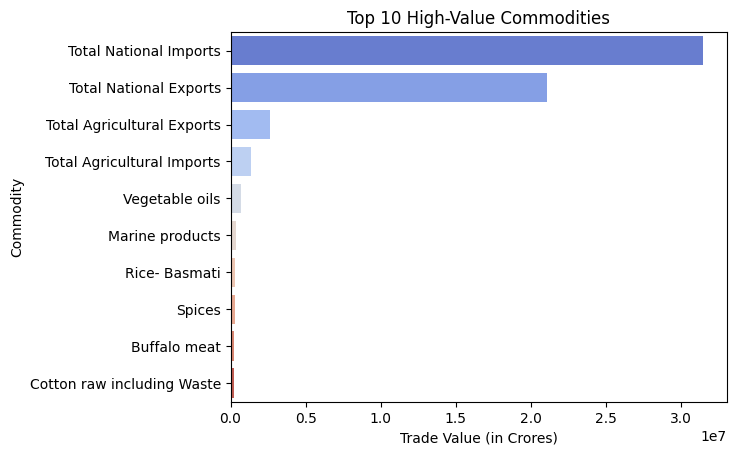

In [34]:
# To identify Top 10 High Value Commodity
top_commodities = data.groupby("Commodity type")["Value of imports or exports"].sum().reset_index()
top_10 = top_commodities.sort_values(by="Value of imports or exports", ascending=False).head(10)

sns.barplot(x="Value of imports or exports", y="Commodity type", data=top_10, palette="coolwarm")
plt.xlabel("Trade Value (in Crores)")
plt.ylabel("Commodity")
plt.title("Top 10 High-Value Commodities")
plt.show()


INTERPRETATION:
 
This horizontal bar chart helps in identifying the top-performing agricultural commodities in terms of trade value. It helps in making trade policy recommendations for boosting exports and reducing unnecessary imports. The highest trade values are seen in Total National Imports & Exports, followed by Total Agricultural Imports & Exports. Among specific agricultural commodities, Vegetable oils, Marine products, Rice (Basmati), and Spices have significant trade values.Vegetable oils appear as a high import commodity, suggesting a dependency on external sources.High import dependence on food-related commodities (like edible oils) can create risks during global supply chain disruptions. Commodities like Buffalo meat, Cotton raw, and Spices contribute significantly to India's agricultural exports. Indian trade can be optimized by implementing policies to increase exports of high-performing commodities like Basmati Rice, Buffalo meat, and Spices.

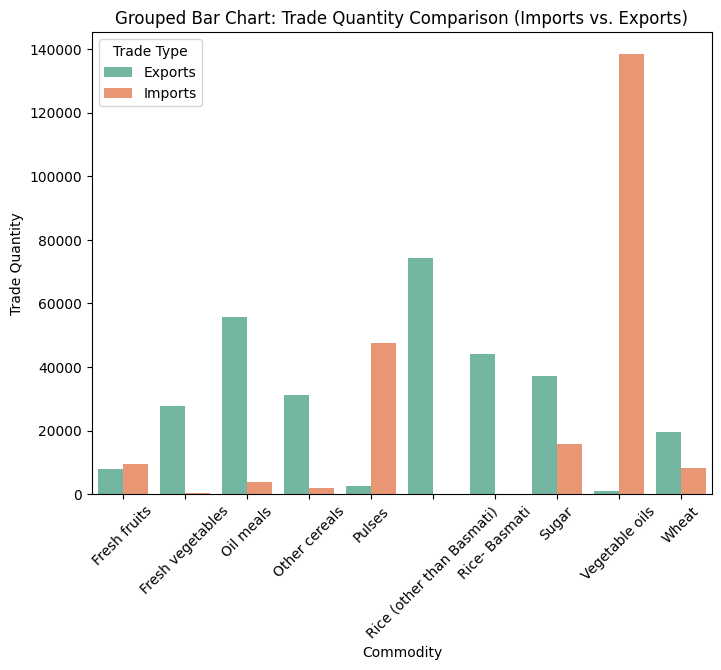

In [50]:
#IMPORT EXPORT COMPARISON ON TOP 10 QUANTITY BASED ON QUANTITY TRADED

# Aggregating trade quantity by commodity and trade type
top_quantity = data.groupby(['Commodity type', 'Imports or exports'])['Quantity of imports or exports'].sum().reset_index()

# Selecting top 10 commodities by total trade quantity
top_10_commodities = top_quantity.groupby('Commodity type').sum().nlargest(10, 'Quantity of imports or exports').reset_index()

# Filtering dataset to only include top 10 commodities
filtered_data = top_quantity[top_quantity["Commodity type"].isin(top_10_commodities["Commodity type"])]

plt.figure(figsize=(8, 6))
sns.barplot(x="Commodity type", y="Quantity of imports or exports", hue="Imports or exports", data=filtered_data, palette="Set2")

plt.xlabel("Commodity")
plt.ylabel("Trade Quantity")
plt.title("Grouped Bar Chart: Trade Quantity Comparison (Imports vs. Exports)")
plt.legend(title="Trade Type")
plt.xticks(rotation=45)
plt.show()

INTERPRETATION:

The chart highlights the total trade quantity of imports and exports for the top 10 traded commodities. Vegetable oils have the highest import quantity, indicating a heavy reliance on imports for this commodity. Rice (other than Basmati) and Oil meals show significant export volumes, suggesting strong export demand.Vegetable oils have disproportionately high imports, which may indicate a supply gap in domestic production.
Rice, oil meals, and sugar have high export volumes, which could be leveraged further for trade expansion. Pulses and wheat show notable imports, highlighting potential areas for domestic production enhancement to reduce import dependency. To optimize trade, India should invest in local production of vegetable oils and pulses to reduce reliance on imports and focus on expanding rice and oil meal exports to strengthen trade balance.

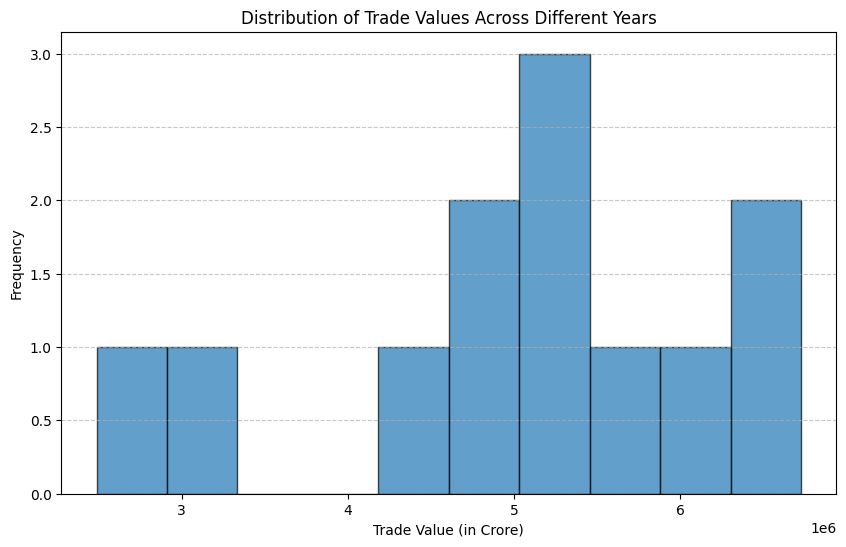

In [29]:
data["YearCode"] = data["YearCode"].astype(int)  # Ensure YearCode is integer

# Grouping trade values by Year
yearly_trade = data.groupby("YearCode")["Value of imports or exports"].sum().reset_index()

# Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(yearly_trade["Value of imports or exports"], bins=10, edgecolor="black", alpha=0.7)

# Formatting
plt.xlabel("Trade Value (in Crore)")
plt.ylabel("Frequency")
plt.title("Distribution of Trade Values Across Different Years")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

INTERPRETATION:

This histogram represents the distribution of trade values across different years. The X-axis represents trade values (in Crores).
The Y-axis represents the frequency (how many times a trade value range appears in different years). Trade values are spread across a range, roughly between ₹2.5 million to ₹6.5 million. The most frequent trade values lie between 4.5 million and 5.5 million, indicating that most years had trade values in this range. There are some fluctuations, but no extreme outliers, implying a relatively consistent trade pattern over the years.If India wants to optimize agricultural trade, it can focus on the most frequent trade value ranges to identify patterns in successful years.

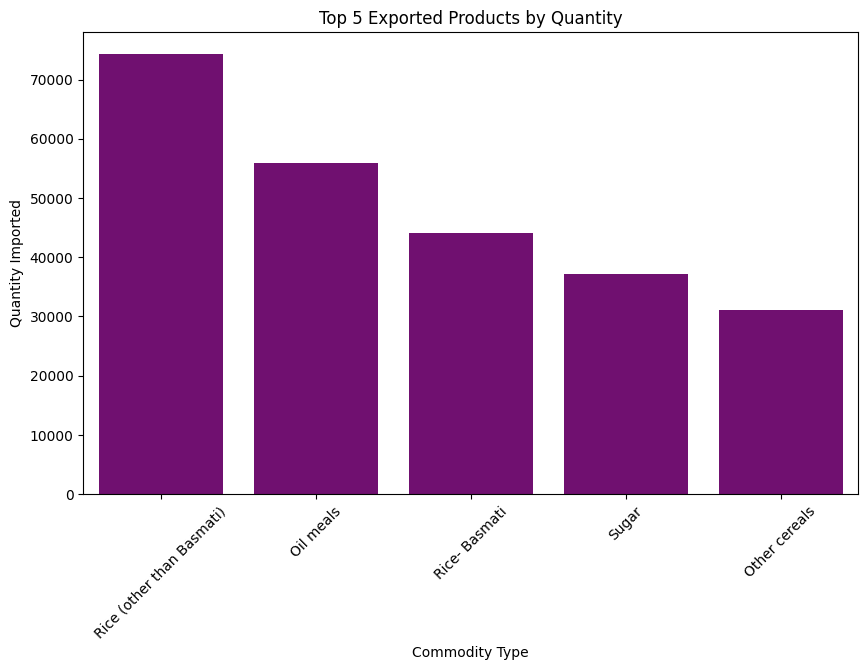

In [71]:
#TOP 5 COMMODITIES IN EXPORTS

# Aggregating total import quantity by commodity
top_imports = data[data["Imports or exports"] == "Exports"].groupby("Commodity type")["Quantity of imports or exports"].sum()

# Selecting top 5 commodities by export quantity
top_5_imports = top_imports.nlargest(5)

# Plot the top 5 exported commodities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_imports.index, y=top_5_imports.values, color="purple")

plt.xlabel("Commodity Type")
plt.ylabel("Quantity Imported")
plt.title("Top 5 Exported Products by Quantity")
plt.xticks(rotation=45)  # Rotate x labels for better visibility

plt.show()

INTERPRETATION:

Rice (other than Basmati) is the most exported product, indicating a strong demand in international markets for non-Basmati rice. Oil meals are the second-largest exported commodity, which suggests a high demand in livestock and poultry feed industries. India’s export dependency on agricultural products (rice, oil meals, sugar, and cereals) highlights the country’s strength in agri-based trade. The dominance of rice exports (both Basmati and non-Basmati) suggests an opportunity to enhance branding, quality control, and market expansion strategies. To enhance the profit, India can invest in food processing and branding, expand into new international markets to reduce dependency on a few commodities.


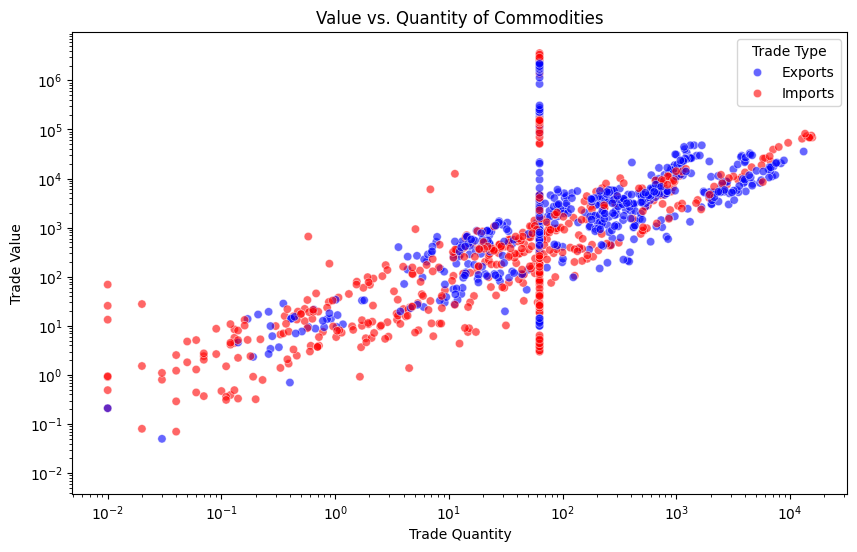

In [ ]:
#SCATTER PLOT QUANTITY vs VALUE Relationship

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["Quantity of imports or exports"],
    y=data["Value of imports or exports"],
    hue=data["Imports or exports"],
    alpha=0.6,
    palette={"Imports": "red", "Exports": "blue"}
)

plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")
plt.xlabel("Trade Quantity")
plt.ylabel("Trade Value")
plt.title("Value vs. Quantity of Commodities")
plt.legend(title="Trade Type")
plt.show()


INTERPRETATION:

The scatter plot provides insights into the relationship between trade quantity and trade value for different commodities, categorized as imports (red) and exports (blue).

In trade datasets, some commodities have very high trade quantities and values (e.g., rice, wheat), while others have very low values (e.g., spices, specialty crops), A log scale evenly distributes the points, allowing for better comparison of trade efficiency by compressing large values and spreads small values, making it easier to visualize differences.

There is a general upward trend, meaning as the trade quantity increases, the trade value also increases.
This suggests that higher-volume commodities contribute significantly to trade value. Exports tend to have a wider spread at higher values, indicating higher-value commodities being exported in smaller or larger quantities. Imports are more spread out at lower values, suggesting that some imported commodities are of lower trade value despite high volume. There are vertical clusters around specific quantities, which could indicate certain commodities consistently traded in fixed amounts. Focus on exporting more high-value commodities, Identify low-value, high-quantity imports and consider domestic production alternatives to reduce dependency.

**BUSINESS RECOMMENDATIONS**

To optimize India’s agricultural trade and enhance profitability while ensuring food security, a data-driven approach should be adopted. Strengthening domestic production is crucial to reduce dependency on high-volume imports such as edible oils and pulses, which can be achieved through targeted incentives for local farmers and improved agricultural infrastructure. Export strategies should focus on high-value commodities like premium basmati rice, organic spices, and processed agricultural products to maximize trade revenue. Enhancing trade agreements with emerging markets can create new opportunities for surplus commodities like wheat and cotton. Additionally, improving trade efficiency by addressing supply chain gaps and monitoring price fluctuations can help reduce inefficiencies in export performance. Implementing AI-driven demand forecasting and real-time trade monitoring will enable better decision-making, ensuring India remains competitive in the global agricultural trade landscape.

**CONCLUSION**

The analysis of India’s agricultural trade highlights key trends and opportunities for optimization and provides key insights into trade volume trends, high-value commodities, commodity-wise performance, and trade efficiency. The study highlights the importance of optimizing export strategies for high-value goods while ensuring a balanced import policy to maintain food security. Trade efficiency can be enhanced by addressing logistical gaps and improving supply chain management.  Leveraging data-driven insights, improving trade agreements, and enhancing agricultural productivity can help India strengthen its position in global agricultural trade, ensuring both economic growth and food security.